In [1]:
!pip install geopy

In [2]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geo_colab")

In [3]:
location = geolocator.geocode("Ngong, Kajiado, Kenya")
print(f"Address: {location.address}")
print(f"Latitude: {location.latitude}, Longitude: {location.longitude}")


Address: Ngong, Ngong ward, Kajiado North, Kajiado, Rift Valley, Kenya
Latitude: -1.3666, Longitude: 36.65


In [4]:
places = ["Ngong, Kenya", "Kiserian, Kenya", "Kitengela, Kenya"]
results = []

for place in places:
    loc = geolocator.geocode(place)
    if loc:
        results.append({
            "place": place,
            "latitude": loc.latitude,
            "longitude": loc.longitude
        })

import pandas as pd
df = pd.DataFrame(results)
df


,place,latitude,longitude
0,"Ngong, Kenya",-1.366600,36.650000
1,"Kiserian, Kenya",-1.430349,36.686756
2,"Kitengela, Kenya",-1.474564,36.959070


In [5]:
import geopandas as gpd
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(df["longitude"], df["latitude"])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")
gdf


,place,latitude,longitude,geometry
0,"Ngong, Kenya",-1.366600,36.650000,POINT (36.65 -1.3666)
1,"Kiserian, Kenya",-1.430349,36.686756,POINT (36.68676 -1.43035)
2,"Kitengela, Kenya",-1.474564,36.959070,POINT (36.95907 -1.47456)


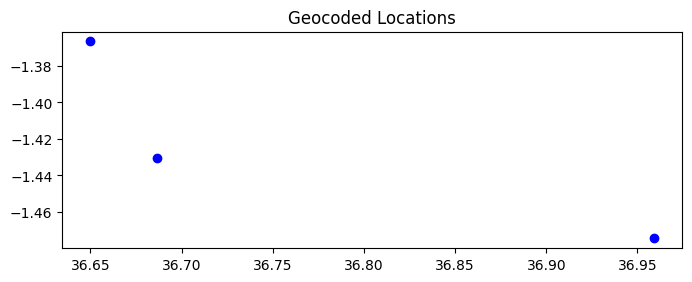

In [7]:
import matplotlib.pyplot as plt
gdf.plot(figsize=(8, 6), color="blue", marker="o")
plt.title("Geocoded Locations")
plt.show()
